# Задача
Необходимо понять предпочтения пользователей, покупающих билеты на разные направления авиакомпании, выполняющей внутренние пассажирские перевозки.

Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

Есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import numpy as np

In [15]:
df1 = pd.read_csv('/datasets/query_1.csv')
df3 = pd.read_csv('/datasets/query_3.csv')
dfLast = pd.read_csv('/datasets/query_last.csv')

# 1. Аналитика

In [16]:
print(df1.info())
print(df1.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
             model  flights_amount
0  Airbus A319-100             607


In [17]:
print(df3.info())
print(df3.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
     city  average_flights
0  Абакан         3.870968


In [18]:
print(dfLast.info())
print(dfLast.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None
   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN


In [19]:
dfLast['festival_week'] = dfLast['festival_week'].fillna(0)
dfLast['festival_week'] = dfLast['festival_week'].astype('int')

In [20]:
# выбрать топ-10 городов по количеству рейсов
dfT10 = df3.sort_values(by = 'average_flights', ascending = False).head(10)

Графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

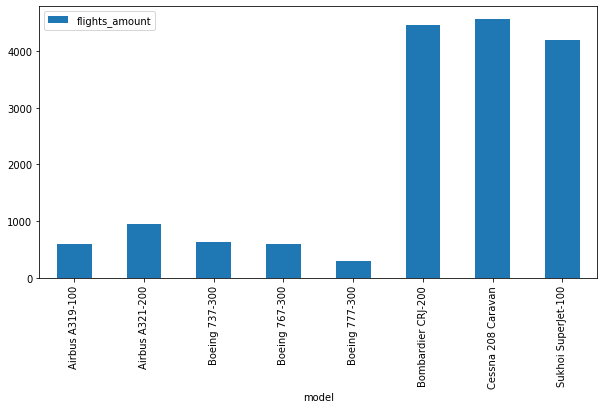

Модели самолётов и количество рейсов


In [21]:
df1.plot(kind = 'bar', x='model', y='flights_amount', style = 'o-', 
                figsize=(10,5), sharex=False)
plt.show()
print('Модели самолётов и количество рейсов')

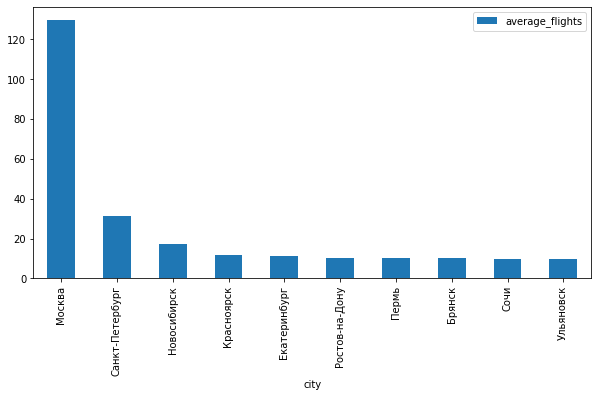

Топ-10 городов и количество рейсов


In [22]:
dfT10.plot(kind = 'bar', x='city', y='average_flights', style = 'o-', 
                figsize=(10,5), sharex=False)
plt.show()
print('Топ-10 городов и количество рейсов')

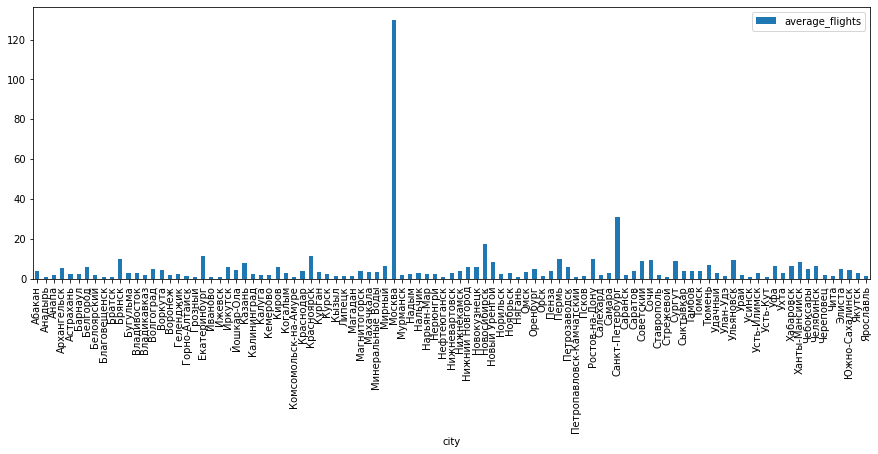

Города и количество рейсов


In [23]:
df3.plot(kind = 'bar', x='city', y='average_flights', style = 'o-', 
                figsize=(15,5), sharex=False)
plt.show()
print('Города и количество рейсов')

### Выводы:

- по графику "Модели самолётов и количество рейсов" - чем меньше самолёт, тем больше на нём рейсов, исходя из статистики компании F9. По всей видимости таких самолётов у неё больше всего.

- по графику "Топ-10 городов и количество рейсов" - на общем фоне сильно выделяется Москва, второе место - СПб как "вторая столица", Новосибирск, как крупный логистический хаб (связь с Китаем и т.п.).
Где деньги (экономика) там и рейсы.

- по графику "Города и количество рейсов" - московский транспортный авиаузел нагружен очень сильно в сравнении с остальными.

# 2. Проверка гипотезы

Гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»

In [24]:
from scipy import stats
np.random.seed(12345678)

dfLast1 = dfLast.query('festival_week != 0')
dfLast2 = dfLast.query('festival_week == 0')
ticketFEST = dfLast1['ticket_amount'].tolist()
ticketNfest = dfLast2['ticket_amount'].tolist()

In [25]:
print(dfLast1['ticket_amount'].describe())
print(dfLast2['ticket_amount'].describe())

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64
count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64


In [26]:
alpha = .1

results = stats.ttest_ind(ticketFEST, ticketNfest, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


### Вывод:

 - Как вы формулировали нулевую и альтернативную гипотезы

Нулевая гипотеза: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Средние двух генеральных совокупностей равны между собой.
Альтернативная гипотеза: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время. 

- Какой критерий использовали для проверки гипотез и почему

В случае t-критерия Уэлча истинные дисперсии уже могут быть не равны, но предпосылка о нормальном распределении данных сохраняется. У нас такой случай. Данных мало, дисперсии не равны, предпосылка о нормальном распределении данных сохраняется.

В 38 % случаев среднее и картина распределения будет схожа. Это большой процент.

Культурные мероприятия не сильно влияют на количество продаваемых билетов.

In [32]:
# Расчёт по U-критерию Манна — Уитни

alpha = .05

results = stats.mannwhitneyu(ticketFEST, ticketNfest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


Этот метод определяет, достаточно ли мала зона перекрещивающихся значений между двумя рядами (ранжированным рядом значений параметра в первой выборке и таким же во второй выборке). Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны.

Ограничения применимости критерия
1. В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
2. В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).

### Общий вывод:

Факторов, влияющих на приток пассажиров (количество продаваемых билетов) в Москву, большое количество, и культурные мероприятия в ней имеют влияние на общую статистику фактор.